<a href="https://colab.research.google.com/github/SagarSonar2698/OLA_ensemble_learning/blob/main/ola_drivers_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ola_driver_scaler.csv')

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
demo_df = df.copy(deep = True)

In [ ]:
df.drop(columns = ['Unnamed: 0'] ,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
convert_dict = {'MMM-YY': np.datetime64,
                'Dateofjoining': np.datetime64
              
                }
 
df = df.astype(convert_dict)

# data normalization

In [ ]:
columns = ['Age','Income','Total Business Value']
for col in columns:
  df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])

# checking for null values

In [ ]:
# summarize the number of rows with missing values for each column
for col in df.columns:
	# count number of rows with missing values
	n_miss = df[[col]].isnull().sum()
	perc = n_miss / df.shape[0] * 100
	print('> %s, Missing: %d (%.1f%%)' % (col, n_miss, perc))

> MMM-YY, Missing: 0 (0.0%)
> Driver_ID, Missing: 0 (0.0%)
> Age, Missing: 61 (0.3%)
> Gender, Missing: 52 (0.3%)
> City, Missing: 0 (0.0%)
> Education_Level, Missing: 0 (0.0%)
> Income, Missing: 0 (0.0%)
> Dateofjoining, Missing: 0 (0.0%)
> LastWorkingDate, Missing: 17488 (91.5%)
> Joining Designation, Missing: 0 (0.0%)
> Grade, Missing: 0 (0.0%)
> Total Business Value, Missing: 0 (0.0%)
> Quarterly Rating, Missing: 0 (0.0%)


here we can see 91.5 % of data from last working date column is null

# KNN imputation

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  float64       
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  float64       
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

**Imputation of only countinious variable which is 'Age' in our case**

**data normalization**

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
df1 = df.drop(columns = ['MMM-YY','City','Dateofjoining', 'LastWorkingDate','Gender'])

In [ ]:
df1

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,-1.065629,2,-0.267358,1,1,1.603674,2
1,1,-1.065629,2,-0.267358,1,1,-1.096482,2
2,1,-1.065629,2,-0.267358,1,1,-0.506666,2
3,2,-0.586223,2,0.044122,2,2,-0.506666,1
4,2,-0.586223,2,0.044122,2,2,-0.506666,1
...,...,...,...,...,...,...,...,...
19099,2788,-0.746025,2,0.148865,2,2,0.149447,3
19100,2788,-0.746025,2,0.148865,2,2,-0.109274,3
19101,2788,-0.746025,2,0.148865,2,2,-0.506666,2
19102,2788,-0.746025,2,0.148865,2,2,-0.329033,2


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df1)
df_imputed = pd.DataFrame(imputed, columns=df1.columns)

In [ ]:
df['Age'] = df_imputed['Age']

# Grouby data over driver id & feature creation

In [ ]:
df_final = demo_df.groupby(['Driver_ID','Age','Gender','City','Education_Level','Dateofjoining','Joining Designation','Grade']).agg({'MMM-YY':'last',
                                                                                                                                                   'Total Business Value' : ['first','last'],
                                                                                                                                                   'Quarterly Rating' : ['first','last'],'LastWorkingDate':'last'})
                                                                                                                                    


In [ ]:
df_final

MMM-YY  \
                                                                                        last   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade             
1         28.0 0.0    C23  2               24/12/18      1                   1      03/01/19   
2         31.0 0.0    C7   2               11/06/20      2                   2      12/01/20   
4         43.0 0.0    C13  2               12/07/19      2                   2      04/01/20   
5         29.0 0.0    C9   0               01/09/19      1                   1      03/01/19   
6         31.0 1.0    C11  1               31/07/20      3                   3      12/01/20   
...                                                                                      ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2      01/01/19   
          45.0 0.0    C19  0               31/07/18      2                   2      09/01/19   
2787      28.0 1.0    C20  2               21/07/18      1                   1      06/01/19   
2788      29.0 0.0    C27  2               06/08/20      2                   2      06/01/20   
          30.0 0.0    C27  2               06/08/20      2                   2      12/01/20   

                                                                                   Total Business Value  \
                                                                                                  first   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade                        
1         28.0 0.0    C23  2               24/12/18      1                   1                  2381060   
2         31.0 0.0    C7   2               11/06/20      2                   2                        0   
4         43.0 0.0    C13  2               12/07/19      2                   2                        0   
5         29.0 0.0    C9   0               01/09/19      1                   1                        0   
6         31.0 1.0    C11  1               31/07/20      3                   3                        0   
...                                                                                                 ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2                   221080   
          45.0 0.0    C19  0               31/07/18      2                   2                   485270   
2787      28.0 1.0    C20  2               21/07/18      1                   1                   408090   
2788      29.0 0.0    C27  2               06/08/20      2                   2                        0   
          30.0 0.0    C27  2               06/08/20      2                   2                   497690   

                                                                                            \
                                                                                      last   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade           
1         28.0 0.0    C23  2               24/12/18      1                   1           0   
2         31.0 0.0    C7   2               11/06/20      2                   2           0   
4         43.0 0.0    C13  2               12/07/19      2                   2           0   
5         29.0 0.0    C9   0               01/09/19      1                   1           0   
6         31.0 1.0    C11  1               31/07/20      3                   3           0   
...                                                                                    ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2      221080   
          45.0 0.0    C19  0               31/07/18      2                   2           0   
2787      28.0 1.0    C20  2               21/07/18      1                   1           0   
2788      29.0 0.0    C27  2               06/08/20      2                   2           0   
          30.0 0.0  

In [ ]:
df_final

MMM-YY  \
                                                                                        last   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade             
1         28.0 0.0    C23  2               24/12/18      1                   1      03/01/19   
2         31.0 0.0    C7   2               11/06/20      2                   2      12/01/20   
4         43.0 0.0    C13  2               12/07/19      2                   2      04/01/20   
5         29.0 0.0    C9   0               01/09/19      1                   1      03/01/19   
6         31.0 1.0    C11  1               31/07/20      3                   3      12/01/20   
...                                                                                      ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2      01/01/19   
          45.0 0.0    C19  0               31/07/18      2                   2      09/01/19   
2787      28.0 1.0    C20  2               21/07/18      1                   1      06/01/19   
2788      29.0 0.0    C27  2               06/08/20      2                   2      06/01/20   
          30.0 0.0    C27  2               06/08/20      2                   2      12/01/20   

                                                                                   Total Business Value  \
                                                                                                  first   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade                        
1         28.0 0.0    C23  2               24/12/18      1                   1                  2381060   
2         31.0 0.0    C7   2               11/06/20      2                   2                        0   
4         43.0 0.0    C13  2               12/07/19      2                   2                        0   
5         29.0 0.0    C9   0               01/09/19      1                   1                        0   
6         31.0 1.0    C11  1               31/07/20      3                   3                        0   
...                                                                                                 ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2                   221080   
          45.0 0.0    C19  0               31/07/18      2                   2                   485270   
2787      28.0 1.0    C20  2               21/07/18      1                   1                   408090   
2788      29.0 0.0    C27  2               06/08/20      2                   2                        0   
          30.0 0.0    C27  2               06/08/20      2                   2                   497690   

                                                                                            \
                                                                                      last   
Driver_ID Age  Gender City Education_Level Dateofjoining Joining Designation Grade           
1         28.0 0.0    C23  2               24/12/18      1                   1           0   
2         31.0 0.0    C7   2               11/06/20      2                   2           0   
4         43.0 0.0    C13  2               12/07/19      2                   2           0   
5         29.0 0.0    C9   0               01/09/19      1                   1           0   
6         31.0 1.0    C11  1               31/07/20      3                   3           0   
...                                                                                    ...   
2786      44.0 0.0    C19  0               31/07/18      2                   2      221080   
          45.0 0.0    C19  0               31/07/18      2                   2           0   
2787      28.0 1.0    C20  2               21/07/18      1                   1           0   
2788      29.0 0.0    C27  2               06/08/20      2                   2           0   
          30.0 0.0  

# Created a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [ ]:
df_final['improvment_in_quat_rating'] = np.where(df_final['Quarterly Rating']['last'] > df_final['Quarterly Rating']['first'],1,0)

# Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [ ]:
pd.set_option('mode.chained_assignment','warn')

In [ ]:
df_final.loc[:,('LastWorkingDate','last')].fillna('0',inplace =True)

In [ ]:
df_final['target'] = np.where(df_final['LastWorkingDate'] != '0',1,0)

# Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [ ]:
df_final['diff_income'] = df_final.loc[:,('Total Business Value','last')] - df_final.loc[:,('Total Business Value','first')]

In [ ]:
df_final['increment_income'] = np.where(df_final['diff_income']>0,1,0)

In [ ]:
df_final.drop(columns = ['diff_income'],inplace = True)

In [ ]:
df_final.reset_index(inplace = True)

In [ ]:
df_final

Driver_ID   Age Gender City Education_Level Dateofjoining  \
                                                                 
0            1  28.0    0.0  C23               2      24/12/18   
1            2  31.0    0.0   C7               2      11/06/20   
2            4  43.0    0.0  C13               2      12/07/19   
3            5  29.0    0.0   C9               0      01/09/19   
4            6  31.0    1.0  C11               1      31/07/20   
...        ...   ...    ...  ...             ...           ...   
3778      2786  44.0    0.0  C19               0      31/07/18   
3779      2786  45.0    0.0  C19               0      31/07/18   
3780      2787  28.0    1.0  C20               2      21/07/18   
3781      2788  29.0    0.0  C27               2      06/08/20   
3782      2788  30.0    0.0  C27               2      06/08/20   

     Joining Designation Grade    MMM-YY Total Business Value          \
                                    last                first    last   
0                      1     1  03/01/19              2381060       0   
1                      2     2  12/01/20                    0       0   
2                      2     2  04/01/20                    0       0   
3                      1     1  03/01/19                    0       0   
4                      3     3  12/01/20                    0       0   
...                  ...   ...       ...                  ...     ...   
3778                   2     2  01/01/19               221080  221080   
3779                   2     2  09/01/19               485270       0   
3780                   1     1  06/01/19               408090       0   
3781                   2     2  06/01/20                    0       0   
3782                   2     2  12/01/20               497690  411480   

     Quarterly Rating      LastWorkingDate improvment_in_quat_rating target  \
                first last            last                                    
0                   2    2        03/11/19                         0      1   
1                   1    1               0                         0      0   
2                   1    1        27/04/20                         0      1   
3                   1    1        03/07/19                         0      1   
4                   1    2               0                         1      0   
...               ...  ...             ...                       ...    ...   
3778                2    2               0                         0      0   
3779                2    1        22/09/19                         0      1   
3780                2    1        20/06/19                         0      1   
3781                1    1               0                         0      0   
3782                3    2               0                         0      0   

     increment_income  
                       
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
3778                0  
3779                0  
3780                0  
3781                0  
3782                0  

[3783 rows x 17 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Driver_ID, )                  3783 non-null   int64  
 1   (Age, )                        3783 non-null   float64
 2   (Gender, )                     3783 non-null   float64
 3   (City, )                       3783 non-null   object 
 4   (Education_Level, )            3783 non-null   int64  
 5   (Dateofjoining, )              3783 non-null   object 
 6   (Joining Designation, )        3783 non-null   int64  
 7   (Grade, )                      3783 non-null   int64  
 8   (MMM-YY, last)                 3783 non-null   object 
 9   (Total Business Value, first)  3783 non-null   int64  
 10  (Total Business Value, last)   3783 non-null   int64  
 11  (Quarterly Rating, first)      3783 non-null   int64  
 12  (Quarterly Rating, last)       3783 non-null   i

In [ ]:
df_final.describe()

Driver_ID          Age       Gender Education_Level  \
                                                               
count  3783.000000  3783.000000  3783.000000     3783.000000   
mean   1407.650806    33.958499     0.412635        1.010309   
std     805.698183     6.140013     0.492373        0.808894   
min       1.000000    21.000000     0.000000        0.000000   
25%     706.500000    29.500000     0.000000        0.000000   
50%    1407.000000    33.000000     0.000000        1.000000   
75%    2114.000000    38.000000     1.000000        2.000000   
max    2788.000000    58.000000     1.000000        2.000000   

      Joining Designation        Grade Total Business Value                \
                                                      first          last   
count         3783.000000  3783.000000         3.783000e+03  3.783000e+03   
mean             1.763151     2.164155         4.106338e+05  3.842511e+05   
std              0.846460     0.986029         8.978219e+05  1.056897e+06   
min              1.000000     1.000000        -2.910060e+06 -1.590270e+06   
25%              1.000000     1.000000         0.000000e+00  0.000000e+00   
50%              2.000000     2.000000         0.000000e+00  0.000000e+00   
75%              2.000000     3.000000         5.016300e+05  4.580050e+05   
max              5.000000     5.000000         1.270150e+07  3.374772e+07   

      Quarterly Rating              improvment_in_quat_rating       target  \
                 first         last                                          
count      3783.000000  3783.000000               3783.000000  3783.000000   
mean          1.716891     1.684642                  0.145652     0.424531   
std           0.963615     0.955761                  0.352803     0.494337   
min           1.000000     1.000000                  0.000000     0.000000   
25%           1.000000     1.000000                  0.000000     0.000000   
50%           1.000000     1.000000                  0.000000     0.000000   
75%           2.000000     2.000000                  0.000000     1.000000   
max           4.000000     4.000000                  1.000000     1.000000   

      increment_income  
                        
count      3783.000000  
mean          0.263019  
std           0.440331  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

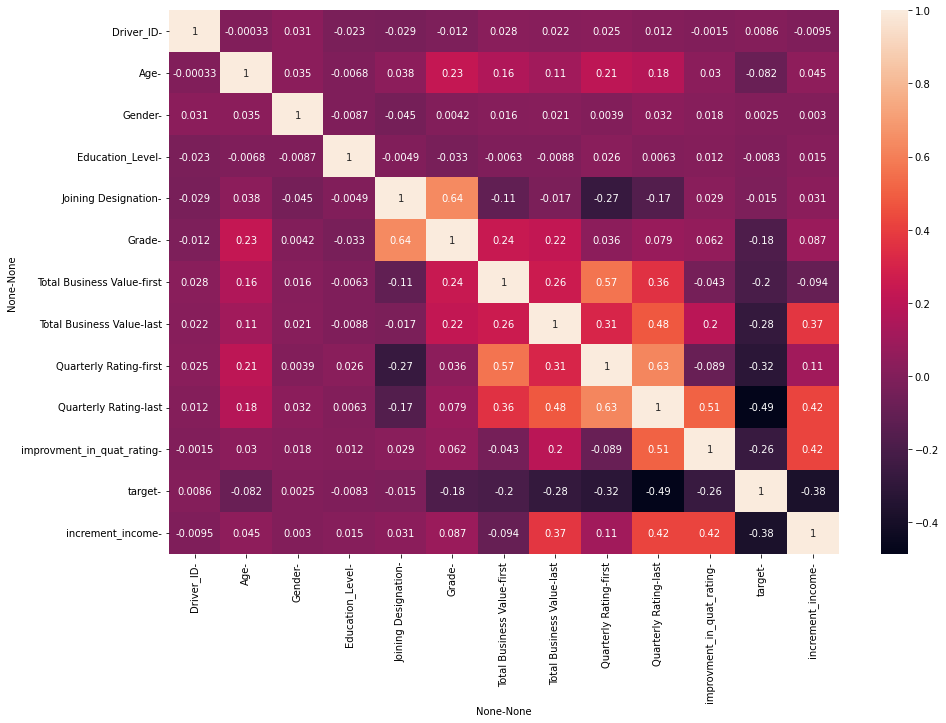

In [ ]:
plt.figure(figsize = (15,10))
corr = df_final.corr()
sns.heatmap(data = corr,annot = True)
plt.show()



1.  quaterly rating and total bussiness values has good correlation,this implies better the rating better total bussiness value generated by ola driver.



In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Driver_ID, )                  3783 non-null   int64  
 1   (Age, )                        3783 non-null   float64
 2   (Gender, )                     3783 non-null   float64
 3   (City, )                       3783 non-null   object 
 4   (Education_Level, )            3783 non-null   int64  
 5   (Dateofjoining, )              3783 non-null   object 
 6   (Joining Designation, )        3783 non-null   int64  
 7   (Grade, )                      3783 non-null   int64  
 8   (MMM-YY, last)                 3783 non-null   object 
 9   (Total Business Value, first)  3783 non-null   int64  
 10  (Total Business Value, last)   3783 non-null   int64  
 11  (Quarterly Rating, first)      3783 non-null   int64  
 12  (Quarterly Rating, last)       3783 non-null   i

In [ ]:
df['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

In [ ]:
df_final['Gender'] = df_final['Gender'].astype('object')
df_final['Education_Level'] = df_final['Education_Level'].astype('object')
df_final['Joining Designation'] = df_final['Joining Designation'].astype('object')
df_final['Grade'] = df_final['Grade'].astype('object')
df_final.loc[:,('Quarterly Rating', 'first')] = df_final.loc[:,('Quarterly Rating', 'first')].astype('object')
df_final.loc[:,('Quarterly Rating', 'last')] = df_final.loc[:,('Quarterly Rating', 'last')].astype('object')
df_final['improvment_in_quat_rating'] = df_final['improvment_in_quat_rating'].astype('object')
df_final['target'] = df_final['target'].astype('object')
df_final['increment_income'] = df_final['increment_income'].astype('object')


# **data exploration**

In [ ]:
np.array(df_final.columns)

array([('Driver_ID', ''), ('Age', ''), ('Gender', ''), ('City', ''),
       ('Education_Level', ''), ('Dateofjoining', ''),
       ('Joining Designation', ''), ('Grade', ''), ('MMM-YY', 'last'),
       ('Total Business Value', 'first'),
       ('Total Business Value', 'last'), ('Quarterly Rating', 'first'),
       ('Quarterly Rating', 'last'), ('LastWorkingDate', 'last'),
       ('improvment_in_quat_rating', ''), ('target', ''),
       ('increment_income', '')], dtype=object)

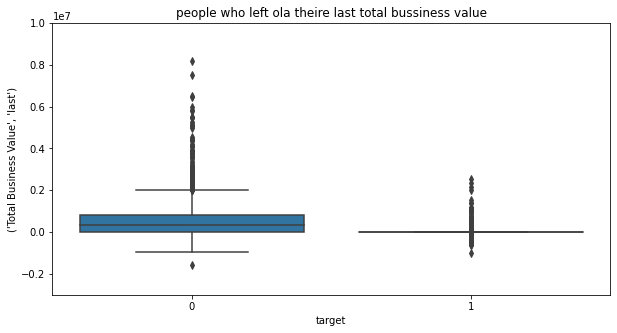

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_final,x = 'target',y = ('Total Business Value', 'last'))
plt.ylim(-3*10**(6),1*10**(7))
plt.title('people who left ola theire last total bussiness value')
plt.show()

drivers who left the job have no total bussiness value or theire rides have very high precentage of cancellation and refunds as compared to drivers who are still in ola

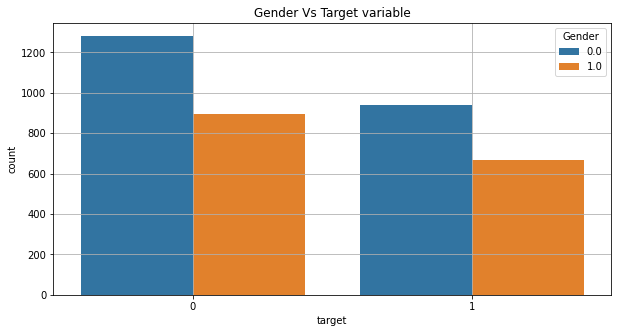

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_final,x = 'target',hue = 'Gender')
plt.title('Gender Vs Target variable')
plt.grid()
plt.show()

males are generally quiting theire jobs from ola than women this is may be happening due to finding better earning opportunity from other firms 

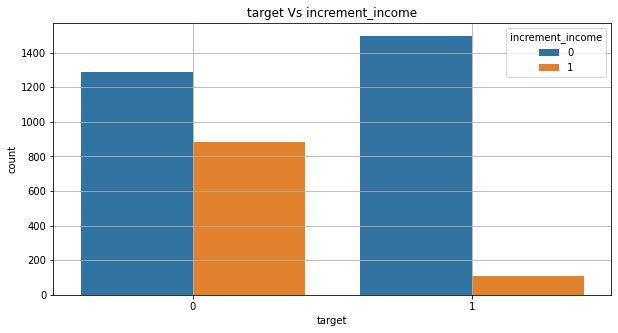

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_final,x = 'target',hue = 'increment_income')
plt.title('target Vs increment_income')
plt.grid()
plt.show()

here we can see most of the people who had not able to incresed theire income are the ones who are leaving ola.

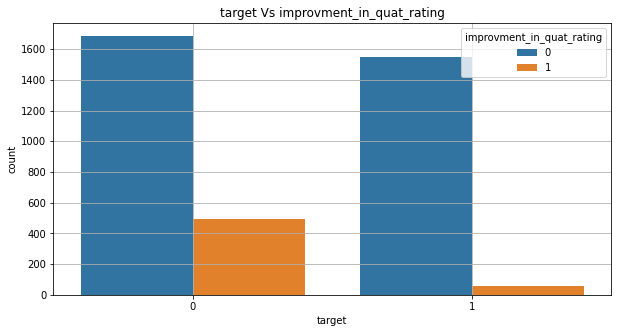

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_final,x = 'target',hue = 'improvment_in_quat_rating')
plt.title('target Vs improvment_in_quat_rating')
plt.grid()
plt.show()

drivers who have no improvement in quaterly rating are more likely to leave ola

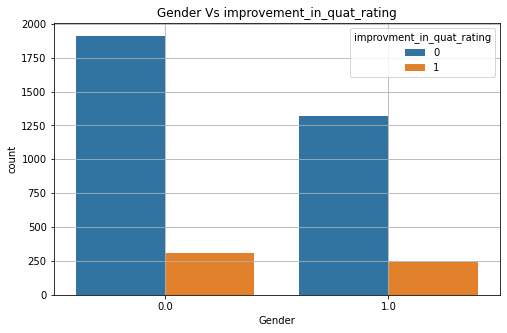

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df_final,x = 'Gender',hue = 'improvment_in_quat_rating')
plt.title('Gender Vs improvement_in_quat_rating')
plt.grid()
plt.show()

here we can see most of the drivers have no improvement in quaterly ratings.its advisable to focus more on incresing quaterly ratings of the drivers.

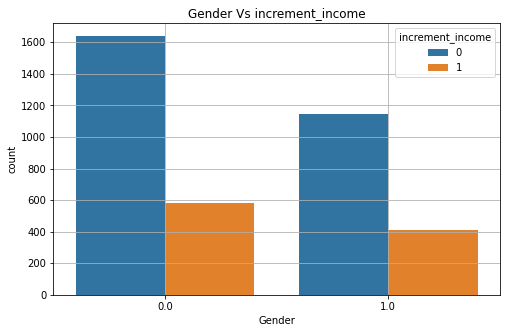

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df_final,x = 'Gender',hue = 'increment_income')
plt.title('Gender Vs increment_income')
plt.grid()
plt.show()

more number of men have incremented theire income than womens this is may be due to more number of mens have able to improve theire quaterly ratings.

# one hot encoading of catogorical variables

since all the columns are are i numerical format hence we does not need to preform one hot encoading on this data also all the categorical columns are such theire order matters hence no reason to perform one hot encoading

In [ ]:
df_final['Dateofjoining'] = df_final['Dateofjoining'].astype('datetime64')
df_final.loc[:,('MMM-YY','last')] = df_final.loc[:,('MMM-YY','last')].astype('datetime64')

In [ ]:
df_final.drop(columns = [('Total Business Value','first'),('Total Business Value', 'last'),('Quarterly Rating', 'first'),('Quarterly Rating', 'last'),('LastWorkingDate', 'last')],inplace = True)

# Class Imbalance Treatment

In [ ]:
df_final.columns

MultiIndex([(                'Driver_ID',     ''),
            (                      'Age',     ''),
            (                   'Gender',     ''),
            (                     'City',     ''),
            (          'Education_Level',     ''),
            (            'Dateofjoining',     ''),
            (      'Joining Designation',     ''),
            (                    'Grade',     ''),
            (                   'MMM-YY', 'last'),
            ('improvment_in_quat_rating',     ''),
            (                   'target',     ''),
            (         'increment_income',     '')],
           )

In [ ]:
cat_columns = [('Gender',''),('Education_Level', ''),('target', ''),('increment_income', ''),('improvment_in_quat_rating', '')]

In [ ]:
for col in cat_columns:
  v = df_final[col].value_counts()
  print('for column name :',col)
  for i in range(len(v)):
    print('percent availibility of data for',i,'is',((v[i]/len(df_final[col]))*100).round(2),'%')


for column name : ('Gender', '')
percent availibility of data for 0 is 58.74 %
percent availibility of data for 1 is 41.26 %
for column name : ('Education_Level', '')
percent availibility of data for 0 is 32.2 %
percent availibility of data for 1 is 34.58 %
percent availibility of data for 2 is 33.23 %
for column name : ('target', '')
percent availibility of data for 0 is 57.55 %
percent availibility of data for 1 is 42.45 %
for column name : ('increment_income', '')
percent availibility of data for 0 is 73.7 %
percent availibility of data for 1 is 26.3 %
for column name : ('improvment_in_quat_rating', '')
percent availibility of data for 0 is 85.43 %
percent availibility of data for 1 is 14.57 %


**Here we can see most imbalnced data consist in improvement_in_quat_rating and increment_income the major difference is in so here we will use oversampling technique to balance the data**

In [ ]:
from sklearn.utils import resample
y = df_final[('improvment_in_quat_rating', '')]
X = df_final.drop(columns = [('improvment_in_quat_rating', '')], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X = pd.concat([X_train, y_train], axis=1)

In [ ]:
# separate minority and majority classes
no_improvement = X[X[('improvment_in_quat_rating', '')]==0]
improvement = X[X[('improvment_in_quat_rating', '')]==1]

In [ ]:
# upsample minority
improvement_upsampled = resample(improvement,
                          replace=True, # sample with replacement
                          n_samples=len(no_improvement), # match number in majority class
                          random_state=27) # reproducible results

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([no_improvement, improvement_upsampled])

**value count after upsampling**

In [ ]:
upsampled[('improvment_in_quat_rating','')].value_counts()

0    2263
1    2263
Name: (improvment_in_quat_rating, ), dtype: int64

In [ ]:
upsampled.columns

MultiIndex([(                'Driver_ID',     ''),
            (                      'Age',     ''),
            (                   'Gender',     ''),
            (                     'City',     ''),
            (          'Education_Level',     ''),
            (            'Dateofjoining',     ''),
            (      'Joining Designation',     ''),
            (                    'Grade',     ''),
            (                   'MMM-YY', 'last'),
            (                   'target',     ''),
            (         'increment_income',     ''),
            ('improvment_in_quat_rating',     '')],
           )

# Modelling

In [ ]:
ml_df = upsampled[[('Age', ''),
                          ('Gender', ''),('City', ''),('Education_Level', ''),
                   ('Joining Designation', ''),('Grade', ''),('target', ''),
                ('increment_income', ''),('improvment_in_quat_rating', '')]]

In [ ]:
ml_df

,Age,Gender,City,Education_Level,Joining Designation,Grade,target,increment_income,improvment_in_quat_rating
,,,,,,,,,
1334,37.0,1.0,C25,2,2,3,0,0,0
2606,27.0,0.0,C28,1,3,3,1,0,0
2673,37.0,0.0,C10,1,3,3,1,0,0
428,47.0,0.0,C10,2,2,4,1,0,0
34,32.0,0.0,C5,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...
564,36.0,0.0,C13,2,3,3,0,0,1
3129,32.0,1.0,C25,0,3,3,0,0,1
537,36.0,1.0,C13,0,2,2,0,1,1


# target encoading on city columns

In [ ]:
city_map = ml_df.groupby('City')['target'].mean().to_dict()

In [ ]:
ml_df['City'] = ml_df['City'].map(city_map)

<ipython-input-155-e82b5d0e801a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['City'] = ml_df['City'].map(city_map)


# Standerdisation of training data

In [ ]:
ml_df

,Age,Gender,City,Education_Level,Joining Designation,Grade,target,increment_income,improvment_in_quat_rating
,,,,,,,,,
1334,37.0,1.0,0.376238,2,2,3,0,0,0
2606,27.0,0.0,0.287879,1,3,3,1,0,0
2673,37.0,0.0,0.297297,1,3,3,1,0,0
428,47.0,0.0,0.297297,2,2,4,1,0,0
34,32.0,0.0,0.256757,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...
564,36.0,0.0,0.414062,2,3,3,0,0,1
3129,32.0,1.0,0.376238,0,3,3,0,0,1
537,36.0,1.0,0.414062,0,2,2,0,1,1


In [ ]:
ml_df.columns

MultiIndex([(                      'Age', ''),
            (                   'Gender', ''),
            (                     'City', ''),
            (          'Education_Level', ''),
            (      'Joining Designation', ''),
            (                    'Grade', ''),
            (                   'target', ''),
            (         'increment_income', ''),
            ('improvment_in_quat_rating', '')],
           )

In [ ]:
columns = [('Age', ''),( 'Education_Level', ''),('Joining Designation', ''),('Grade', '')]
for col in columns:
  ml_df[col] = (ml_df[col] - np.mean(ml_df[col]))/np.std(ml_df[col])

<ipython-input-158-68079e35291e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df[col] = (ml_df[col] - np.mean(ml_df[col]))/np.std(ml_df[col])


In [ ]:
ml_df.head()

,Age,Gender,City,Education_Level,Joining Designation,Grade,target,increment_income,improvment_in_quat_rating
,,,,,,,,,
1334,0.483864,1.0,0.376238,1.203496,0.255167,0.801691,0,0,0
2606,-1.168692,0.0,0.287879,-0.039265,1.425263,0.801691,1,0,0
2673,0.483864,0.0,0.297297,-0.039265,1.425263,0.801691,1,0,0
428,2.136419,0.0,0.297297,1.203496,0.255167,1.821205,1,0,0
34,-0.342414,0.0,0.256757,-0.039265,1.425263,0.801691,1,0,0


In [ ]:
ml_df.columns = [''.join(x) for x in ml_df.columns]

In [ ]:
ml_df = ml_df.astype('int')

# Ensemble learning (Bagging)  

first of all lets build a basic model whithout any instructions i.e with default values

In [ ]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = ml_df.drop(['target'],axis=1).astype('int')

# Putting response variable to y
y = ml_df['target'].astype('int')

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       948
           1       0.56      0.59      0.58       410

    accuracy                           0.74      1358
   macro avg       0.69      0.70      0.69      1358
weighted avg       0.74      0.74      0.74      1358



**classification report description**

**precision :** Precision is defined as the ratio of true positives to the sum of true and false positives.

**recall :** Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 score :** The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support :** Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

here from f1 score we can see for predicting 1 the probability of correctly predicting is only 59% i.e model doing desent job in predicting a variable

# Hyper-Parameter tuning For the model

## Hyper tuning for MAX_DEPTH

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 20, 2)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.174963,0.009466,0.017226,0.000870,4,{'max_depth': 4},0.749211,0.774448,0.780757,0.729858,...,0.756618,0.018614,8,0.769534,0.771113,0.773875,0.762130,0.775542,0.770439,0.004651
1,0.182515,0.004916,0.018584,0.000280,6,{'max_depth': 6},0.760252,0.779180,0.782334,0.770932,...,0.770198,0.009686,3,0.788477,0.784925,0.783346,0.786982,0.786588,0.786064,0.001768
2,0.189214,0.004738,0.022115,0.003396,8,{'max_depth': 8},0.758675,0.777603,0.790221,0.772512,...,0.773357,0.010487,1,0.798737,0.799921,0.791634,0.799211,0.795266,0.796954,0.003106
3,0.239450,0.048622,0.026705,0.007809,10,{'max_depth': 10},0.768139,0.774448,0.785489,0.756714,...,0.772092,0.009486,2,0.805446,0.803078,0.800710,0.803945,0.801183,0.802873,0.001752
4,0.208713,0.004930,0.023602,0.001916,12,{'max_depth': 12},0.758675,0.780757,0.771293,0.761453,...,0.768938,0.007992,4,0.805446,0.803473,0.801105,0.804339,0.801183,0.803109,0.001722


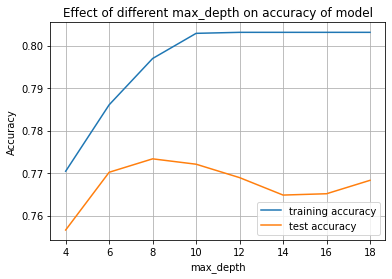

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.title('Effect of different max_depth on accuracy of model')
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

here we can see test and train accuracy increses upto max_depth = 8 after that training accuracy increses but on unseen test data its accuracy decreses

## Hyper tuning for n_estimators

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=8),
             param_grid={'n_estimators': range(100, 1500, 100)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.438792,0.056117,0.046432,0.017323,100,{'n_estimators': 100},0.758675,0.782334,0.790221,0.774092,...,0.775251,0.010668,9,0.800316,0.798343,0.795185,0.799211,0.794872,0.797585,0.002181
1,0.824168,0.054318,0.100962,0.023467,200,{'n_estimators': 200},0.757098,0.780757,0.791798,0.775671,...,0.774935,0.011560,12,0.801500,0.798343,0.795580,0.797239,0.796450,0.797822,0.002052
2,1.339085,0.205919,0.106498,0.008475,300,{'n_estimators': 300},0.761830,0.782334,0.793375,0.770932,...,0.774617,0.011736,14,0.800316,0.798343,0.795185,0.798422,0.795661,0.797585,0.001907
3,1.025635,0.442712,0.088341,0.023987,400,{'n_estimators': 400},0.758675,0.782334,0.793375,0.774092,...,0.775250,0.011922,10,0.800316,0.797553,0.794396,0.798422,0.793688,0.796875,0.002490
4,0.928774,0.003100,0.095936,0.004412,500,{'n_estimators': 500},0.760252,0.782334,0.790221,0.772512,...,0.775566,0.010136,6,0.799921,0.797948,0.795580,0.799211,0.796450,0.797822,0.001629


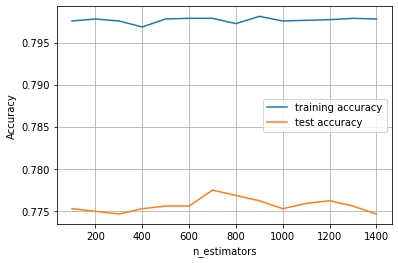

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

here we can see n_estimator is not contributing much towards accuracy of the model and hence we will go with n_estimaor = 300 because beyond that n_estimator VS accuracy curve is almost flat

## Hyper tuning for max_features

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,3,5,6,8]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8,n_estimators=300)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=300),
             param_grid={'max_features': [2, 3, 5, 6, 8]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.572284,0.007002,0.061828,0.003303,2,{'max_features': 2},0.757098,0.782334,0.793375,0.774092,...,0.776514,0.011847,1,0.799921,0.797553,0.792818,0.796450,0.796450,0.796638,0.002293
1,0.594111,0.012461,0.058615,0.001620,3,{'max_features': 3},0.763407,0.777603,0.787066,0.767773,...,0.772724,0.008548,2,0.800710,0.797159,0.794396,0.798028,0.794477,0.796954,0.002366
2,0.633895,0.010745,0.059943,0.004837,5,{'max_features': 5},0.757098,0.780757,0.787066,0.767773,...,0.772409,0.010486,3,0.798343,0.797553,0.789661,0.798028,0.794477,0.795612,0.003279
3,0.854962,0.369116,0.088685,0.042265,6,{'max_features': 6},0.755521,0.777603,0.783912,0.767773,...,0.770832,0.009622,4,0.798737,0.796764,0.792028,0.799606,0.795266,0.796480,0.002692
4,0.706300,0.007930,0.059661,0.001595,8,{'max_features': 8},0.757098,0.776025,0.783912,0.769352,...,0.770516,0.009054,5,0.798343,0.797553,0.791634,0.800000,0.797239,0.796954,0.002827


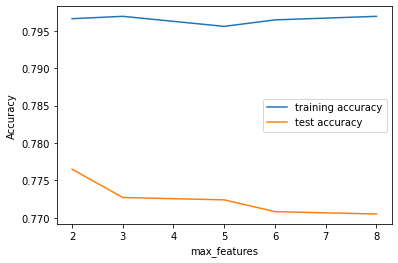

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

due to the fact that data we have has only 9 columns hence we can see as we increse the number of features accuracy is decresing hence we will consider max_features = 2

# lets put all in one place

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,5,6,8],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300,400], 
    'max_features': [2,3,5,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 6, 8],
                         'max_features': [2, 3, 5, 6, 8],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300, 400]},
             verbose=1)

In [ ]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.77114898989899 using {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap = True ,
                             max_depth=2,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             class_weight='balanced',
                             max_features=5,
                             n_estimators=300
                    )

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       min_samples_leaf=100, min_samples_split=400,
                       n_estimators=300)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       948
           1       0.56      0.75      0.64       410

    accuracy                           0.74      1358
   macro avg       0.71      0.75      0.72      1358
weighted avg       0.78      0.74      0.75      1358



here we can see f1 scores have been improved from 58% to 64% for predicting 1 in target variable 

# **insights and suggestions**

* drivers who left the job have no total bussiness value or theire rides have 
very high precentage of cancellation and refunds as compared to drivers who are still in ola so its recommended to Ola make sure driver have less no of cnacellation of rides or refunds the possibale reason for cancellation and refund can be found out if we have additional data .

* males are generally quiting theire jobs from ola than women this is may be happening due to finding better earning opportunity from other cab service providers , it can be prevent by giving incetives for number of miles driven during a day this will engage drivers to drive cabs most of the time for ola.

* here we can see most of the people who had not able to incresed theire income are the ones who are leaving ola .

* drivers who have no improvement in quaterly rating are more likely to leave ola , quaterly rating plays important role in earning of the driver  hence ola must have conduct some training sessions and train them ragrding importance of  ratings and its effect on earning potential.

* more number of men have incremented theire income than womens this is may be due to more number of mens have able to improve theire quaterly ratings.